<center><h1>Structural Time Series modeling in TensorFlow Probability</h1></center>

# 0. Prelim

## 0.1 Packages

In [7]:
from pathlib import Path

import numpy as np
import pandas as pd

import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp

from matplotlib import pyplot as plt

## 0.2 Paths

In [8]:
DATA_FOLDER = Path("../../data")
RAW_DATA_FOLDER = DATA_FOLDER / "raw"

# 1. Data

Text(0.5, 1.0, 'Monthly avearge CO2 concentration, Mauna Loa, Hawaii')

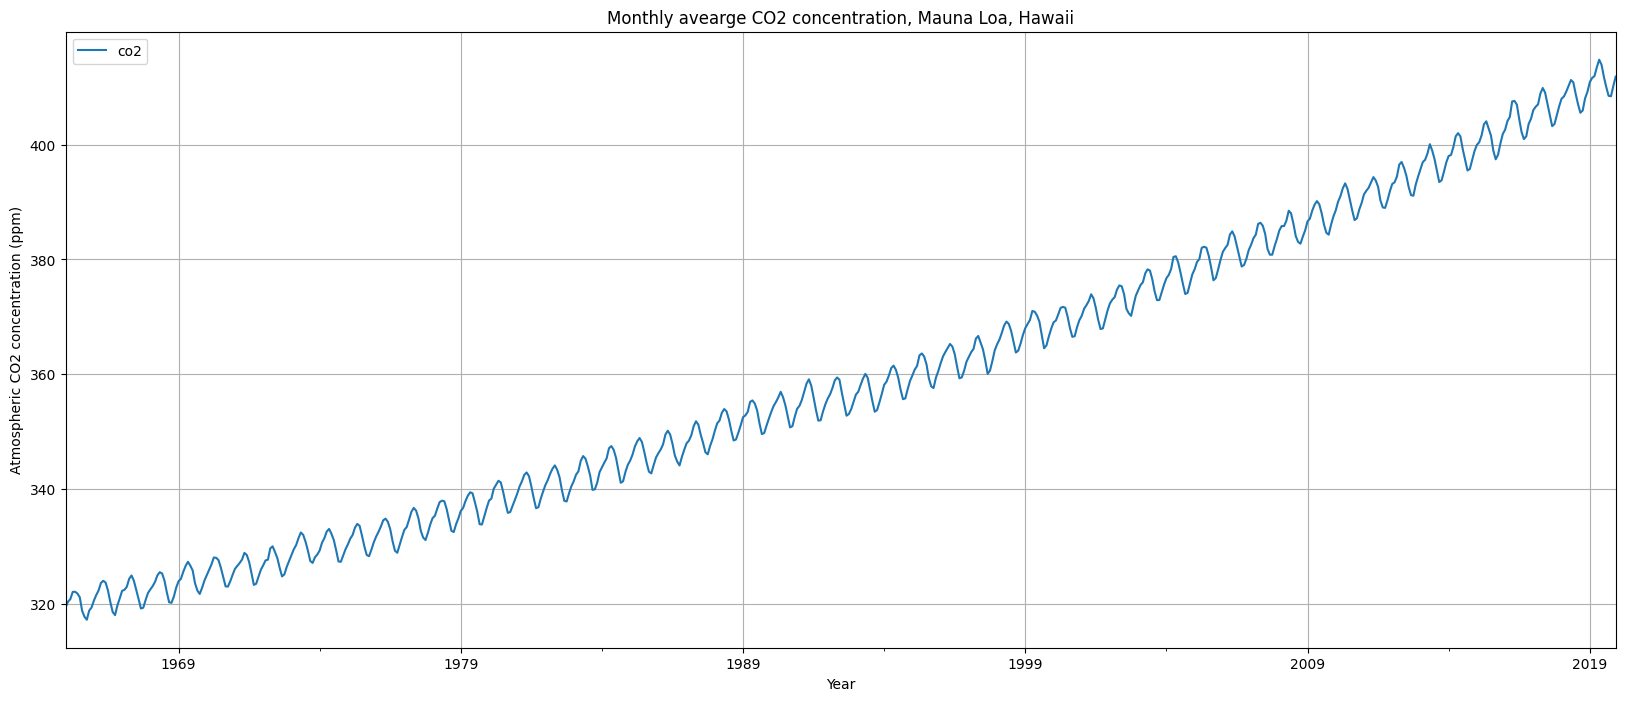

In [13]:
# A. Extract Data
df_co2_by_month = pd.read_csv(
    RAW_DATA_FOLDER / "monthly_in_situ_co2_mlo.csv",
    skiprows=56, header=[1,2,3]
)

# B. Data Transformation
# B1. Select Columns
df_co2_by_month.columns = [(col[0].strip(), col[1].strip()) for col in df_co2_by_month.columns]
df_co2_by_month = df_co2_by_month.loc[: , [('Yr',''), ('Mn',''), ('CO2','')]]
df_co2_by_month.columns = [col[0].strip() for col in df_co2_by_month.columns]
# B2. Create Date Column
df_co2_by_month.rename(columns={'Yr' : 'year', 'Mn' : 'month', 'CO2' : 'co2'}, inplace=True)
df_co2_by_month['day'] = 1
df_co2_by_month['month_dt'] = pd.to_datetime(df_co2_by_month[['year', 'month','day']])
df_co2_by_month.drop(columns=['year', 'month', 'day'], inplace=True)
# B3. Define Date Column as Index
df_co2_by_month.set_index('month_dt', inplace=True)
# B4. Resampling
df_co2_by_month = df_co2_by_month.resample("M").mean()
# B4. Remove Dates
df_co2_by_month = df_co2_by_month['1965-01-01':'2019-12-31']

# C. Display
# C1. Figure
fig, ax = plt.subplots(figsize=(20,8))
# C2. Plot
df_co2_by_month.plot(ax=ax)
# C3. Format
ax.grid(True)
ax.set_xlabel('Year')
ax.set_ylabel('Atmospheric CO2 concentration (ppm)')
ax.set_title("Monthly avearge CO2 concentration, Mauna Loa, Hawaii")

# 2. Modeling

## 2.1 Local Linear Trend

In [15]:
trend = tfp.sts.LocalLinearTrend(observed_time_series=df_co2_by_month)
seasonal = tfp.sts.Seasonal(
    num_seasons=12, observed_time_series=df_co2_by_month)
model = tfp.sts.Sum([trend, seasonal], observed_time_series=df_co2_by_month)